In [1]:
import json
from tools.visualizations import generate_block_diagram
from tools.validations import is_closed_loop, get_ports_and_terminals, model_satisfies_block

In [2]:
with open("models/simple_model.json", "r") as file:
    model_data = json.load(file)

# Print to verify the data
model_data


{'processors': [{'ID': 'f',
   'Parent': 'F',
   'Name': 'Dynamics',
   'Ports': ['X', 'U'],
   'Terminals': ['X']}],
 'wires': [{'ID': 'wrefX',
   'Parent': 'X',
   'Name': 'State Feedback',
   'Source': ['f', 0],
   'Destination': ['f', 0]}]}

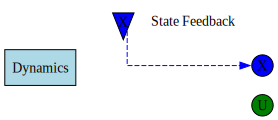

In [3]:
generate_block_diagram(model_data)

In [4]:
is_closed_loop(model_data)

Connected Ports: {('f', 0)}
Open Port Found: Processor 'f', Port Index 1 (U)


False

In [5]:
get_ports_and_terminals(model_data)

{'open_ports': [('f', 'U')], 'available_terminals': [('f', 'X')]}

In [6]:
get_ports_and_terminals(model_data,output_style="effective")

([], ['X'])

In [7]:
with open("models/dynamic_game_with_learning.json", "r") as file:
    dynamic_game_with_learning_data = json.load(file)

In [8]:
dynamic_game_with_learning_data

{'processors': [{'ID': 'alice_dynamics',
   'Parent': 'F',
   'Name': "Alice's Dynamics",
   'Ports': ['X', 'U'],
   'Terminals': ['X']},
  {'ID': 'bob_dynamics',
   'Parent': 'F',
   'Name': "Bob's Dynamics",
   'Ports': ['X', 'U'],
   'Terminals': ['X']},
  {'ID': 'state_aggregator',
   'Parent': 'A',
   'Name': 'State Aggregator',
   'Ports': ['X', 'X'],
   'Terminals': ['X']},
  {'ID': 'alice_sensor',
   'Parent': 'S',
   'Name': "Alice's Sensor",
   'Ports': ['X'],
   'Terminals': ['Y']},
  {'ID': 'bob_sensor',
   'Parent': 'S',
   'Name': "Bob's Sensor",
   'Ports': ['X'],
   'Terminals': ['Y']},
  {'ID': 'alice_learner',
   'Parent': 'Learner',
   'Name': "Alice's Learner",
   'Ports': ['U', 'Y', 'Y'],
   'Terminals': ['Theta']},
  {'ID': 'alice_decision',
   'Parent': 'Decision',
   'Name': "Alice's Decision",
   'Ports': ['Theta'],
   'Terminals': ['U', 'Y']},
  {'ID': 'bob_learner',
   'Parent': 'Learner',
   'Name': "Bob's Learner",
   'Ports': ['U', 'Y', 'Y'],
   'Terminals

In [9]:
is_closed_loop(dynamic_game_with_learning_data)

Connected Ports: {('bob_learner', 1), ('bob_dynamics', 0), ('bob_decision', 0), ('alice_dynamics', 0), ('alice_learner', 2), ('bob_learner', 0), ('state_aggregator', 1), ('alice_sensor', 0), ('bob_sensor', 0), ('alice_decision', 0), ('bob_dynamics', 1), ('state_aggregator', 0), ('alice_learner', 1), ('bob_learner', 2), ('alice_learner', 0), ('alice_dynamics', 1)}


True

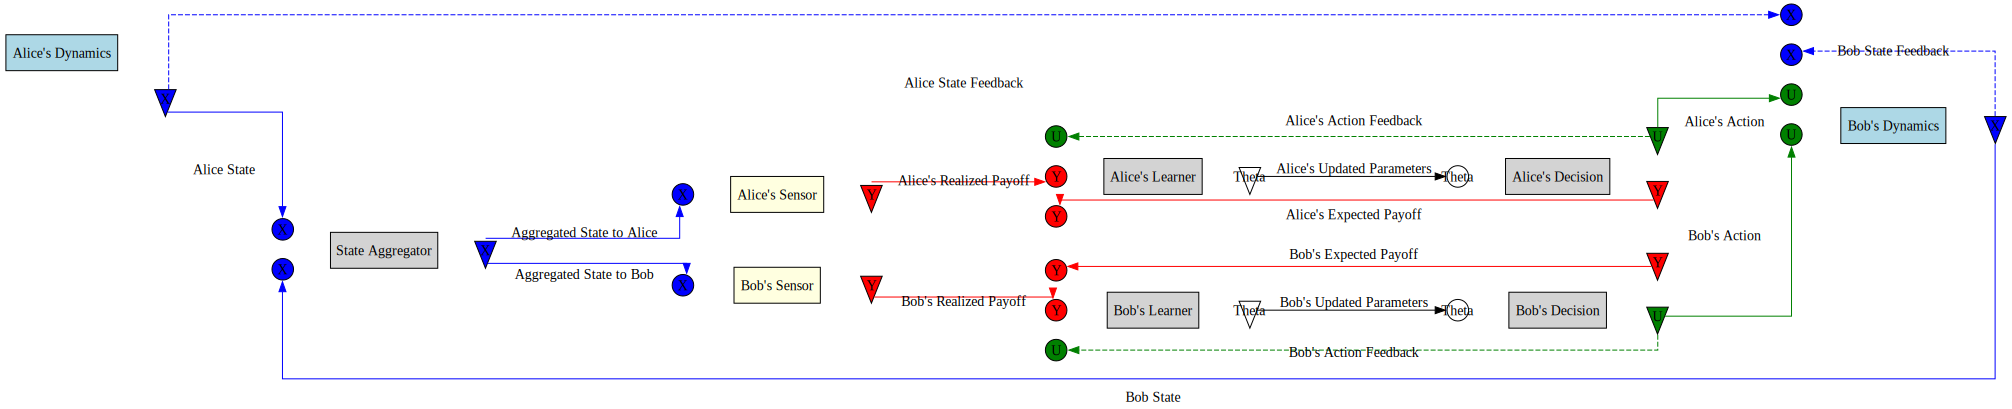

In [10]:
generate_block_diagram(dynamic_game_with_learning_data)

In [11]:
get_ports_and_terminals(dynamic_game_with_learning_data)

{'open_ports': [],
 'available_terminals': [('alice_dynamics', 'X'),
  ('bob_dynamics', 'X'),
  ('state_aggregator', 'X'),
  ('alice_sensor', 'Y'),
  ('bob_sensor', 'Y'),
  ('alice_learner', 'Theta'),
  ('alice_decision', 'U'),
  ('alice_decision', 'Y'),
  ('bob_learner', 'Theta'),
  ('bob_decision', 'U'),
  ('bob_decision', 'Y')]}

In [12]:
get_ports_and_terminals(dynamic_game_with_learning_data, output_style="effective")

([], [])

In [13]:
with open("component_library.json", "r") as file:
    library = json.load(file)

# Print to verify the data
library

{'spaces': [{'ID': 'X',
   'Name': 'state',
   'Description': 'The state space of a dynamical system'},
  {'ID': 'Y',
   'Name': 'output',
   'Description': 'The observable signals for a dynamical system'},
  {'ID': 'U',
   'Name': 'input',
   'Description': 'The controllable signals for a dynamical system'},
  {'ID': 'Theta',
   'Name': 'parameters',
   'Description': 'The parameters of a learner'}],
 'blocks': [{'ID': 'F',
   'Name': 'Function',
   'Description': 'The dynamics of a dynamical system',
   'Domain': ['X', 'U'],
   'Codomain': ['X']},
  {'ID': 'G',
   'Name': 'Policy',
   'Description': 'The control policy used to decide what action to take given an observation',
   'Domain': ['Y'],
   'Codomain': ['U']},
  {'ID': 'S',
   'Name': 'Sensor',
   'Description': 'The sensor which emits observable signals based on state',
   'Domain': ['X'],
   'Codomain': ['Y']},
  {'ID': 'Game',
   'Name': 'Game',
   'Description': "This is a simple two-player game where each player takes an

In [14]:
game = library["blocks"][3]

In [15]:
game

{'ID': 'Game',
 'Name': 'Game',
 'Description': "This is a simple two-player game where each player takes an action in 'U' and receives a payoff in 'Y'.",
 'Domain': ['U', 'U'],
 'Codomain': ['Y', 'Y']}

In [16]:
model_satisfies_block(dynamic_game_with_learning_data, game)


--- Block Validation Debugging (Basic) ---
Block Name: Game
Block Inputs (Domain): Counter({'U': 2})
Model Inputs: Counter()
Missing Inputs: Counter({'U': 2})
Block Outputs (Codomain): Counter({'Y': 2})
Model Outputs: Counter({'Y': 4, 'X': 3, 'Theta': 2, 'U': 2})
Missing Outputs: Counter()
--- End Debugging ---



False

In [17]:
with open("models/dynamic_game.json", "r") as file:
    dynamic_game_data = json.load(file)

In [18]:
get_ports_and_terminals(dynamic_game_data)

{'open_ports': [('alice_dynamics', 'U'),
  ('bob_dynamics', 'U'),
  ('state_aggregator', 'X'),
  ('state_aggregator', 'X')],
 'available_terminals': [('alice_dynamics', 'X'),
  ('bob_dynamics', 'X'),
  ('state_aggregator', 'X'),
  ('alice_sensor', 'Y'),
  ('bob_sensor', 'Y')]}

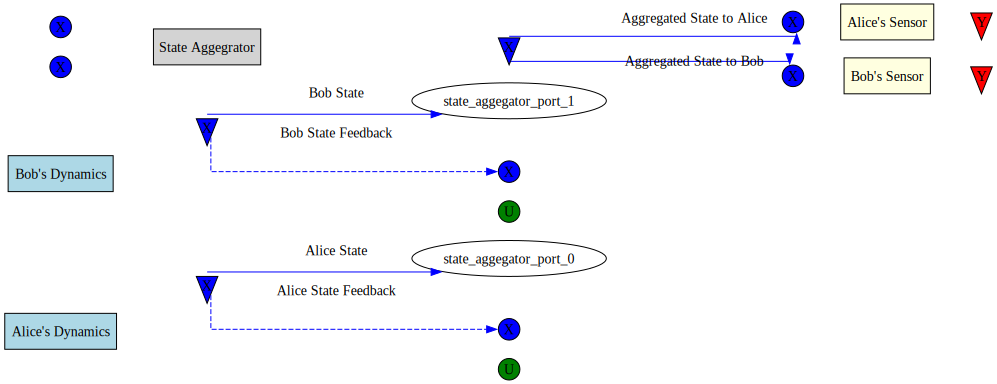

In [19]:
generate_block_diagram(dynamic_game_data)

In [20]:
model_satisfies_block(dynamic_game_data, game)


--- Block Validation Debugging (Basic) ---
Block Name: Game
Block Inputs (Domain): Counter({'U': 2})
Model Inputs: Counter({'U': 2, 'X': 2})
Missing Inputs: Counter()
Block Outputs (Codomain): Counter({'Y': 2})
Model Outputs: Counter({'X': 3, 'Y': 2})
Missing Outputs: Counter()
--- End Debugging ---



True